In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pysgrs
pysgrs.settings.logger.setLevel(40)

In [2]:
pysgrs.__version__

'0.0.19'

In [3]:
text = """
La météo - Quel temps fait-il ?

Avec les prévisions météo, on peut savoir quel temps il fera le soir,
le lendemain ou dans la semaine.
Quand il y a un grand soleil sur la carte, il fera chaud sur la région.

Quand la météo indique un soleil avec des nuages,
il y aura peu de soleil et il y aura souvent du vent.
Le temps sera gris.
S’il y a des nuages avec de la pluie sur la carte, c’est qu’il va pleuvoir et
qu’il y a des risques de tempête ou de grêle.
Si de la pluie tombe alors qu’il y a du soleil,
vous pourrez sans doute observer un arc-en-ciel.

Quand il y a des nuages avec de la neige qui tombe,
c’est qu’il va neiger et qu’il peut y avoir du brouillard,
des risques de congélation, de la glace et que la température sera très basse.
Lorsqu’il y a un éclair avec des nuages et de la pluie,
il risque d’y avoir de la foudre et du tonnerre.
"""

In [4]:
clean = pysgrs.toolbox.Cleaner.clean(text).replace(" ", "").upper()
clean

'LAMETEOQUELTEMPSFAITILAVECLESPREVISIONSMETEOONPEUTSAVOIRQUELTEMPSILFERALESOIRLELENDEMAINOUDANSLASEMAINEQUANDILYAUNGRANDSOLEILSURLACARTEILFERACHAUDSURLAREGIONQUANDLAMETEOINDIQUEUNSOLEILAVECDESNUAGESILYAURAPEUDESOLEILETILYAURASOUVENTDUVENTLETEMPSSERAGRISSILYADESNUAGESAVECDELAPLUIESURLACARTECESTQUILVAPLEUVOIRETQUILYADESRISQUESDETEMPETEOUDEGRELESIDELAPLUIETOMBEALORSQUILYADUSOLEILVOUSPOURREZSANSDOUTEOBSERVERUNARCENCIELQUANDILYADESNUAGESAVECDELANEIGEQUITOMBECESTQUILVANEIGERETQUILPEUTYAVOIRDUBROUILLARDDESRISQUESDECONGELATIONDELAGLACEETQUELATEMPERATURESERATRESBASSELORSQUILYAUNECLAIRAVECDESNUAGESETDELAPLUIEILRISQUEDYAVOIRDELAFOUDREETDUTONNERRE'

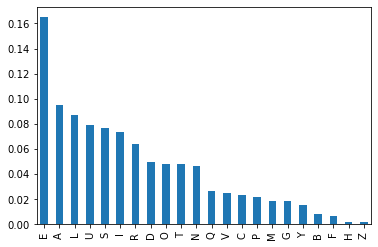

In [5]:
ngrams = pysgrs.toolbox.FrequencyAnalyzer.analyze(clean)
ngrams[0]["frequency"].plot(kind="bar")

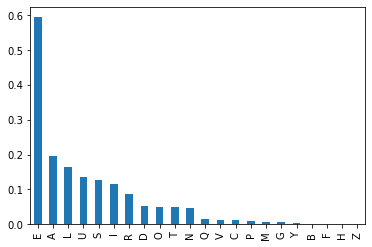

In [6]:
ngrams[0]["coincidence"].plot(kind="bar")

In [7]:
ngrams[0].sum()

count          642.00000
frequency        1.00000
coincidence      1.68859
dtype: float64

In [8]:
V = pysgrs.VigenereCypher(key="HIROSHIMA")

In [9]:
code = V.cypher(clean)
code

'SIDSLLWCULTKSEWARAPBZZSCMOLLAGFWCQEIVVJAWAMAOUXVILZIHOPZHIWSBQMWAZZXLZMLLAFWJSMXEULVASPVAUKIEGDHAQMHQESIBIZDPTPOMUODAULJCDLQXSBZCOUHZFEPTWSJHKTABLJIJSIDENQFBIBIZDSIDSLLWUNKQHIWBVEOSMZZSCMODLAEISNMEISGRIJHXQUKMJCDLQXEAQCMSBZMSVCMSFALGVLVKZWAMYPZAVFSNZUSZQCMSKMENBIXSKHDQCKMCOHSCUEZCIZSJIDTLKVGLXCULCIGZWBDAIYMKEMPTKAKMJFAZYGEZLVHWTXQTLWLRWNZQLLAZRWSIBLBQVHGTJQASWIGIBQXYHLLGGSMULCWLGHVCDRLHJOFZLAUAMFPKLZHEYCEOJJMZCPMCEMHVPISGRRWZVGANMJONLKPESIESANMCUPBFATLKQSAYLWDCIZEPOVFWAYGISXVILFIHOPZUITYWGISTRFVKMERPAHIWZLQCVVXSDHBUOULVZSNTMCLMKEMLTMTLUGSJHBGRLAVFSAZQSIIJGWSWDSXCZZQHCZEJTRWJHDQCKMJBMHOQSLBUSDHXXUPMZZJPACULLPONVQDDLTRTGBLDELBUILVVZEYZV'

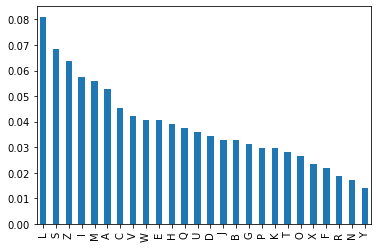

In [10]:
cngrams = pysgrs.toolbox.FrequencyAnalyzer.analyze(code)
cngrams[0]["frequency"].plot(kind="bar")

In [11]:
cngrams[0].sum()

count          642.000000
frequency        1.000000
coincidence      1.138505
dtype: float64

In [12]:
shapes = pysgrs.toolbox.Shaper.get_shapes(len(code))
shapes

,shape,size,padding,shape_diff,score
id,,,,,
min-square,"(25, 25)",625.0,-17.0,0.0,-1.697644e-05
opt-rect-1,"(25, 26)",650.0,8.0,1.0,4.641749e-06
opt-rect-2,"(26, 25)",650.0,8.0,1.0,4.641749e-06
rect-25,"(25, 26)",650.0,8.0,1.0,4.641749e-06
rect-26,"(26, 25)",650.0,8.0,1.0,4.641749e-06
...,...,...,...,...,...
rect-637,"(637, 2)",1274.0,632.0,635.0,1.554789e+11
rect-638,"(638, 2)",1276.0,634.0,636.0,1.579495e+11
rect-639,"(639, 2)",1278.0,636.0,637.0,1.604530e+11


In [13]:
n = len(code)
coincidences = []
for ncol in np.arange(1, 26):
    nrow = int(np.ceil(n/ncol))
    block = pysgrs.toolbox.Shaper.to_matrix(code, shape=(nrow, ncol))
    for k in np.arange(ncol):
        frag = pysgrs.toolbox.Shaper.to_str(block[:,k])
        coincidence = pysgrs.toolbox.FrequencyAnalyzer.analyze(frag, max_ngram=1)[0].sum()["coincidence"]
        coincidences.append({"keysize": ncol, "column": k, "coincidence": coincidence})


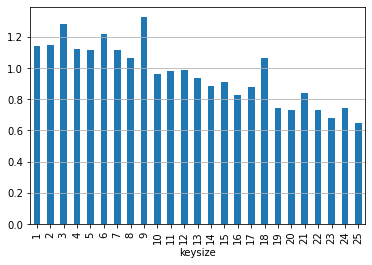

In [20]:
axe = pd.DataFrame(coincidences).groupby("keysize")["coincidence"].mean().plot(kind="bar")
axe.grid(axis='y')

In [15]:
len(V.key)

9